## importing all the libraries

In [1]:
import cv2
import os
import subprocess
from astropy.io import fits,ascii
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.table import Table
import multiprocessing
from astropy.table import Table
import numpy as np

In [2]:
#os.chdir("/home/alam/task/task-inspecity/source-ex")

## plotting the result of source extractor

(1024, 1024)


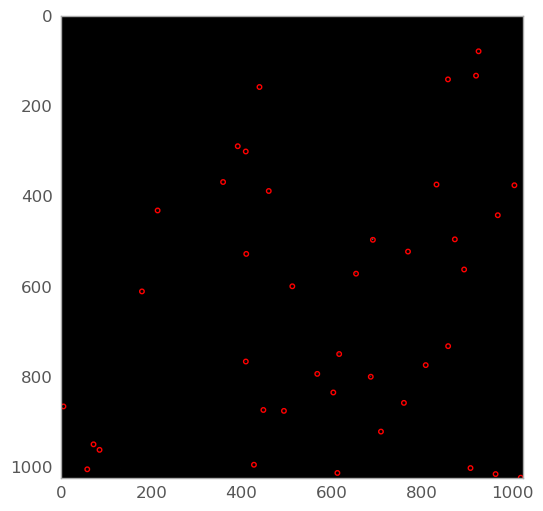

In [3]:
sext1 = ascii.read('/home/alam/task/task-inspecity/source-ex/test.cat',format = 'sextractor')
sext1.sort(['MAG_ISO'])
sext2 = sext1[0:40]
sextx = sext2['X_IMAGE']
sexty = sext2['Y_IMAGE']
sex_mag = sext2['MAG_ISO']
sext_x = (sextx-512)*0.0027 

sext_y = (sexty-512)*0.0027
#hdul = fits.open('/home/alam/task/task-inspecity/source-ex/img-0001.fits')
#image_data = hdul[0].data



image_data = fits.getdata('/home/alam/task/task-inspecity/source-ex/img_fits.fits',ext = 0)
print(image_data.shape)
plt.figure()
plt.imshow(image_data,cmap = 'gray')
plt.grid(False)

for x_coord, y_coord in zip(sextx, sexty):
    circle = plt.Circle((x_coord, y_coord), radius=5, color='r', fill=False)
    plt.gca().add_patch(circle)

plt.show()


In [4]:
sext1

X_IMAGE,Y_IMAGE,MAG_ISO
pix,pix,mag
float64,float64,float64
691.1735,496.3013,-7.4658
686.4218,799.8023,-6.4832
653.8292,571.3306,-6.458
616.4156,749.454,-6.0904
567.867,793.4402,-5.6014
409.5101,766.0656,-5.2932
1004.8326,375.4149,-5.1705
214.0,431.2519,-5.0321


## storing the x and y coordinates of matched object

In [5]:
ascii.write([sext_x, sext_y, sex_mag], '/home/alam/task/task-inspecity/sex_t', delimiter = ' ', format = 'no_header',overwrite=True, formats = {'col0':'% 15.10f', 'col1':'% 15.10f', 'col2':'% 15.10f'})

## running match algorithm to find best catalog

In [6]:
ra_dec = [(ra, dec) for ra in range(0, 360, 5) for dec in range(-80, 90, 5)]

def call_match(ra_dec):
    RA1, DEC1 = ra_dec
    # Transform RA and DEC in string and make the path for catalog.
    path_catalog1 = '/home/alam/task/task-inspecity/star_tracker/Star_Tracker/RPI/Catalog/Projected' +  '/cat_RA_'
    path_catalog2 = str(RA1) + '_DEC_' + str(DEC1)
    path_catalog3 = path_catalog1 + path_catalog2
    # Do Match.
    parameters1 = 'matchrad=1 trirad=0.002 nobj=15 scale=1'
    command = 'match ' + '/home/alam/task/task-inspecity/sex_t' + ' 0 1 2 ' + path_catalog3 + ' 0 1 2 ' + parameters1
    
    results = subprocess.run(command, shell=True, capture_output=True, text=True)
    stdout_str = results.stdout
    return stdout_str

pool = multiprocessing.Pool(2)
results = pool.map(call_match, ra_dec)

In [7]:
results

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'TRANS: a=-9.450823681e-01 b=1.121215614e+00 c=-1.138130261e-01 d=1.427006398e-01 e=1.036010671e-01 f=-4.425970355e-01 sig=1.4307e-02 Nr=7 Nm=8 sx=8.5787e-02 sy=1.8025e-01 \n',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '

## creating and storing all values in table

In [8]:
match1_table1 = Table(names=('RA_center', 'DEC_center', 'sig', 'Nr'))


In [9]:
for i, item in enumerate(results):
    RA1, DEC1 = ra_dec[i]
    
    
    match1_aux1 = item.find('sig=')
    match1_aux2 = item.find('Nr=')
    match1_auxsig1 = item[match1_aux1+4:match1_aux1+25]
    match1_auxnr1 = item[match1_aux2+3:match1_aux2+10]
    match1_sig1 = match1_auxsig1.split(' ', 1)[0]
    match1_nr1 = match1_auxnr1.split(' ', 1)[0]
    if match1_sig1 and match1_nr1:  # Check if both 'sig' and 'Nr' values are non-empty
            match1_table1.add_row([str(RA1), str(DEC1), match1_sig1, match1_nr1])

In [10]:
match1_table1.sort('Nr',reverse=True)

In [11]:
match1_table1

RA_center,DEC_center,sig,Nr
float64,float64,float64,float64
195.0,-65.0,0.0079187,27.0
210.0,-55.0,0.00014769,26.0
170.0,-65.0,0.018395,25.0
215.0,-70.0,0.0019713,25.0
185.0,-40.0,0.032583,25.0
220.0,-45.0,0.00077386,25.0
185.0,-45.0,0.044981,24.0
235.0,-65.0,0.0012989,24.0
200.0,-55.0,0.0002247,24.0


In [12]:
if len(match1_table1) >= 3:
        a = match1_table1[0]['sig']
        b = match1_table1[1]['sig']
        c = match1_table1[2]['sig']
        if a <= b:
            if a <= c:
                i = 0
            else:
                i = 2
        else:
            if b <= c:
                i = 1
            else:
                i = 2

## getting the linear parameter for best catalog

In [13]:
match1_RA = int(match1_table1[i][0])
match1_DEC = int(match1_table1[i][1])
path_catalog1 = '/home/alam/task/task-inspecity/star_tracker/Star_Tracker/RPI/Catalog/Projected' +  '/cat_RA_'
path_catalog6 = str(match1_RA) + '_DEC_' + str(match1_DEC)
path_catalog7 = path_catalog1 + path_catalog6
parameters1 = 'matchrad=1 trirad=0.002 nobj=15 scale=1'
Match2 = 'match ' + '/home/alam/task/task-inspecity/sex_t' + ' 0 1 2 ' + path_catalog7 + ' 0 1 2 ' + parameters1
results = subprocess.run(Match2, shell=True, capture_output=True, text=True)
stdout_str = results.stdout
stdout_str

'TRANS: a=7.905892933e-02 b=2.701705558e-01 c=-9.930121047e-01 d=1.502917612e-01 e=-9.954250723e-01 f=-2.795097545e-01 sig=1.4769e-04 Nr=26 Nm=33 sx=2.3342e-02 sy=2.4394e-02 \n'

In [14]:
match1_RA

210

In [15]:
match1_aux5 = stdout_str.find('a=')
match1_aux6 = stdout_str.find('b=')
match1_aux7 = stdout_str.find('c=')
match1_aux8 = stdout_str.find('d=')
match1_aux9 = stdout_str.find('e=')
match1_aux10 = stdout_str.find('f=')
match1_aux11 = stdout_str.find('sig=')
match1_aux12 = stdout_str.find('Nr=')
match1_aux13 = stdout_str.find('Nm=')
match1_auxa1 = stdout_str[match1_aux5+2:match1_aux5+25]
match1_auxb1 = stdout_str[match1_aux6+2:match1_aux6+25]
match1_auxc1 = stdout_str[match1_aux7+2:match1_aux7+25]
match1_auxd1 = stdout_str[match1_aux8+2:match1_aux8+25]
match1_auxe1 = stdout_str[match1_aux9+2:match1_aux9+25]
match1_auxf1 = stdout_str[match1_aux10+2:match1_aux10+25]
match1_auxsig3 = stdout_str[match1_aux11+4:match1_aux11+25]
match1_auxnr3 = stdout_str[match1_aux12+3:match1_aux12+10]
match1_auxnm3 = stdout_str[match1_aux13+3:match1_aux13+10]
match1_sig3 = match1_auxsig3.split(' ', 1)[0]
match1_nr3 = match1_auxnr3.split(' ', 1)[0]
match1_nm3 = match1_auxnm3.split(' ', 1)[0]
match1_auxa2 = match1_auxa1.split(' ', 1)[0]
match1_auxb2 = match1_auxb1.split(' ', 1)[0]
match1_auxc2 = match1_auxc1.split(' ', 1)[0]
match1_auxd2 = match1_auxd1.split(' ', 1)[0]
match1_auxe2 = match1_auxe1.split(' ', 1)[0]
match1_auxf2 = match1_auxf1.split(' ', 1)[0]
match1_a = float(match1_auxa2)
match1_b = float(match1_auxb2)
match1_c = float(match1_auxc2)
match1_d = float(match1_auxd2)
match1_e = float(match1_auxe2)
match1_f = float(match1_auxf2)

In [16]:
match1_a

0.07905892933

## defining my rotational and translation matrix

In [17]:
match1_T = np.array([(match1_a), (match1_d)])
match1_R = np.array([(match1_b, match1_c), (match1_e, match1_f)])

In [18]:
match1_T

array([0.07905893, 0.15029176])

In [19]:
match1_R

array([[ 0.27017056, -0.9930121 ],
       [-0.99542507, -0.27950975]])

## getting first estimate of ra and dec value of (0,0)

In [20]:
match1_x_pix = 0
match1_y_pix = 0
match1_X_pix = np.array([(match1_x_pix), (match1_y_pix)])
match1_X_cielo = match1_T + np.dot(match1_R, match1_X_pix)
match1_RA_new = match1_X_cielo[0]
match1_DEC_new = match1_X_cielo[1]


In [21]:
f = 3.04 #mm
dep1_xi = match1_RA_new/f
dep1_eta = match1_DEC_new/f
dep1_RA_r = match1_RA*(np.pi/180)
dep1_DEC_r = match1_DEC*(np.pi/180)
dep1_arg1 = np.cos(dep1_DEC_r) - dep1_eta*np.sin(dep1_DEC_r)
dep1_arg2 = np.arctan(dep1_xi/dep1_arg1)
dep1_alpha1 = match1_RA + (180/np.pi)*dep1_arg2
dep1_arg3 = np.sin(dep1_arg2)
dep1_arg4 = dep1_eta*np.cos(dep1_DEC_r) + np.sin(dep1_DEC_r)
dep1_delta1 = (180/np.pi)*np.arctan((dep1_arg3*dep1_arg4)/dep1_xi)

In [35]:
print(f"RA = {dep1_alpha1}")
print(f"DEC={dep1_delta1}")

RA = 212.42504616179815
DEC=-52.14484026234992


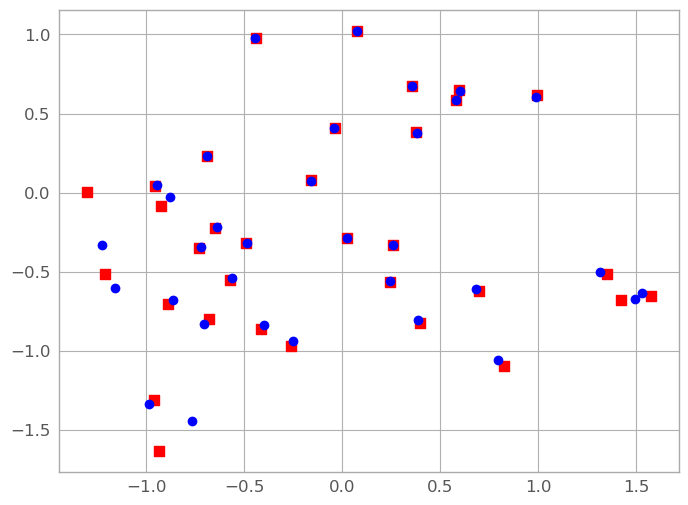

In [23]:
x_coords_a = []
y_coords_a = []
with open('/home/alam/task/task-inspecity/notebooks/matched.mtA', 'r') as file:
        for line in file:
            # Split the line into x and y coordinates
            _,x, y,_ = map(float, line.split())
            x_coords_a.append(x)
            y_coords_a.append(y)

x_coords_b = []
y_coords_b = []
with open('/home/alam/task/task-inspecity/notebooks/matched.mtB', 'r') as file:
        for line in file:
            # Split the line into x and y coordinates
            _,x, y,_ = map(float, line.split())
            x_coords_b.append(x)
            y_coords_b.append(y)


plt.scatter(x_coords_a,y_coords_a,color = 'r',marker = 's',s=50,label = 'from image')
plt.scatter(x_coords_b,y_coords_b,color = 'b',label = 'from catalog')

## starting second iteration projected all matched point with respect to new projection point 

In [24]:
cat_nor = '/home/alam/task/task-inspecity/star_tracker/Star_Tracker/RPI/Catalog/Normal/'
new_cat1 = cat_nor + 'cat_RA_' + str(match1_RA) + '_DEC_' + str(match1_DEC)
new_cat2 = ascii.read(new_cat1)
np_matched_B1 = ascii.read('/home/alam/task/task-inspecity/notebooks/matched.mtB')
np_matched_B2 = ascii.read('/home/alam/task/task-inspecity/notebooks/matched.unB')
np_aux1 = np_matched_B1[0][0]
np_aux2 = np_matched_B2[0][0]

if np_aux1>np_aux2:
    np_cont1 = np_aux2
else:
    np_cont1 = np_aux1

np_table1 = Table([[], [], []])

for i in range(0, len(np_matched_B1), 1):
    np_cont2 = np_matched_B1[i][0] - np_cont1
    np_table1.add_row([new_cat2[np_cont2][0], new_cat2[np_cont2][1], new_cat2[np_cont2][2]])

In [25]:
cat_tran1 = Table([[], [], []])
conv1_largo1 = len(np_table1)

for index in range (0, conv1_largo1):
    conv1_alpha_d = np_table1[index][0]
    conv1_delta_d = np_table1[index][1]
    conv1_mag = np_table1[index][2]
    
    conv1_alpha_r = (np.pi/180)*conv1_alpha_d
    conv1_delta_r = (np.pi/180)*conv1_delta_d
    conv1_alpha_0_r = (np.pi/180)*dep1_alpha1
    conv1_delta_0_r = (np.pi/180)*dep1_delta1
    
    conv1_xi_up = np.cos(conv1_delta_r)*np.sin(conv1_alpha_r - conv1_alpha_0_r)
    conv1_xi_down = np.sin(conv1_delta_0_r)*np.sin(conv1_delta_r) + np.cos(conv1_delta_0_r)*np.cos(conv1_delta_r)*np.cos(conv1_alpha_r - conv1_alpha_0_r)
    conv1_xi = conv1_xi_up/conv1_xi_down
    
    conv1_eta_up = np.cos(conv1_delta_0_r)*np.sin(conv1_delta_r) - np.sin(conv1_delta_0_r)*np.cos(conv1_delta_r)*np.cos(conv1_alpha_r - conv1_alpha_0_r)
    conv1_eta_down = conv1_xi_down
    conv1_eta = conv1_eta_up/conv1_eta_down
    
    conv1_xi_mm = f*conv1_xi
    conv1_eta_mm = f*conv1_eta
    
    cat_tran1.add_row([conv1_xi_mm, conv1_eta_mm, conv1_mag])

In [26]:
cat_tran1

col0,col1,col2
float64,float64,float64
-0.8162199102841627,-1.6740101628768749,4.0
-0.2984593916312359,-1.1152732900184967,3.62
-1.0464229062933732,-1.566139091812503,3.32
0.767666536380976,-1.19336886817005,1.92
-0.45303176345808277,-1.0194599117716623,2.69
0.3465636761753478,-0.9537261201075632,2.89
-0.7666053200883082,-1.0275437677301822,3.64
0.18866072454322208,-0.7049398421691199,3.19
-0.6268425534013499,-0.7186806199982159,1.33


In [27]:
ascii.write(cat_tran1, 'new_cat', delimiter = ' ', format = 'no_header', overwrite=True,formats = {'col0':'% 15.5f', 'col1':'% 15.5f', 'col2':'% 15.2f'})

## apllied match algorithm on new matched point to get new parameters

In [28]:
new_parameters1 = 'trirad=0.002 nobj=20 max_iter=3 matchrad=1 scale=1'
Match4 = 'match ' + '/home/alam/task/task-inspecity/sex_t' + ' 0 1 2 ' + '/home/alam/task/task-inspecity/notebooks/new_cat' + ' 0 1 2 ' + new_parameters1
result_2 = subprocess.run(Match4, shell=True, capture_output=True, text=True)
stdout_str = result_2.stdout
stdout_str

'TRANS: a=-8.825161425e-04 b=3.116390410e-01 c=-9.946329329e-01 d=-6.254434464e-03 e=-9.908971722e-01 f=-3.133543198e-01 sig=1.1632e-05 Nr=22 Nm=32 sx=2.3565e-02 sy=2.9492e-02 \n'

In [29]:
match2_aux1 = stdout_str.find('a=')
match2_aux2 = stdout_str.find('b=')
match2_aux3 = stdout_str.find('c=')
match2_aux4 = stdout_str.find('d=')
match2_aux5 = stdout_str.find('e=')
match2_aux6 = stdout_str.find('f=')
match2_aux7 = stdout_str.find('sig=')
match2_aux8 = stdout_str.find('Nr=')
match2_auxa1 = stdout_str[match2_aux1+2:match2_aux1+25]
match2_auxb1 = stdout_str[match2_aux2+2:match2_aux2+25]
match2_auxc1 = stdout_str[match2_aux3+2:match2_aux3+25]
match2_auxd1 = stdout_str[match2_aux4+2:match2_aux4+25]
match2_auxe1 = stdout_str[match2_aux5+2:match2_aux5+25]
match2_auxf1 = stdout_str[match2_aux6+2:match2_aux6+25]
match2_auxsig4 = stdout_str[match2_aux7+4:match2_aux7+25]
match2_auxnr4 = stdout_str[match2_aux8+3:match2_aux8+10]
match2_auxa2 = match2_auxa1.split(' ', 1)[0]
match2_auxb2 = match2_auxb1.split(' ', 1)[0]
match2_auxc2 = match2_auxc1.split(' ', 1)[0]
match2_auxd2 = match2_auxd1.split(' ', 1)[0]
match2_auxe2 = match2_auxe1.split(' ', 1)[0]
match2_auxf2 = match2_auxf1.split(' ', 1)[0]
match2_sig = match2_auxsig4.split(' ', 1)[0]
match2_nr = match2_auxnr4.split(' ', 1)[0]
match2_a = float(match2_auxa2)
match2_b = float(match2_auxb2)
match2_c = float(match2_auxc2)
match2_d = float(match2_auxd2)
match2_e = float(match2_auxe2)
match2_f = float(match2_auxf2)

In [30]:
match2_T = np.array([(match2_a), (match2_d)])
match2_R = np.array([(match2_b, match2_c), (match2_e, match2_f)]) 

match2_x_pix = 0
match2_y_pix = 0
match2_X_pix = np.array([(match2_x_pix), (match2_y_pix)])
match2_X_cielo = match2_T + np.dot(match2_R, match2_X_pix)
match2_RA_new = match2_X_cielo[0]
match2_DEC_new = match2_X_cielo[1]

match2_roll_r = np.arctan2(match2_c, match2_b)
match2_roll_d = (180/np.pi)*match2_roll_r


In [31]:
dep2_xi = match2_RA_new/f
dep2_eta = match2_DEC_new/f
dep2_RA_r = dep1_alpha1*(np.pi/180)
dep2_DEC_r = dep1_delta1*(np.pi/180)
dep2_arg1 = np.cos(dep2_DEC_r) - dep2_eta*np.sin(dep2_DEC_r)
dep2_arg2 = np.arctan(dep2_xi/dep2_arg1)
dep2_alpha1 = dep1_alpha1 + (180/np.pi)*dep2_arg2
dep2_arg3 = np.sin(dep2_arg2)
dep2_arg4 = dep2_eta*np.cos(dep2_DEC_r) + np.sin(dep2_DEC_r)
dep2_delta1 = (180/np.pi)*np.arctan((dep2_arg3*dep2_arg4)/dep2_xi)

In [32]:
print(dep2_alpha1)
print(dep2_delta1)

212.3978699001058
-52.26271615348797


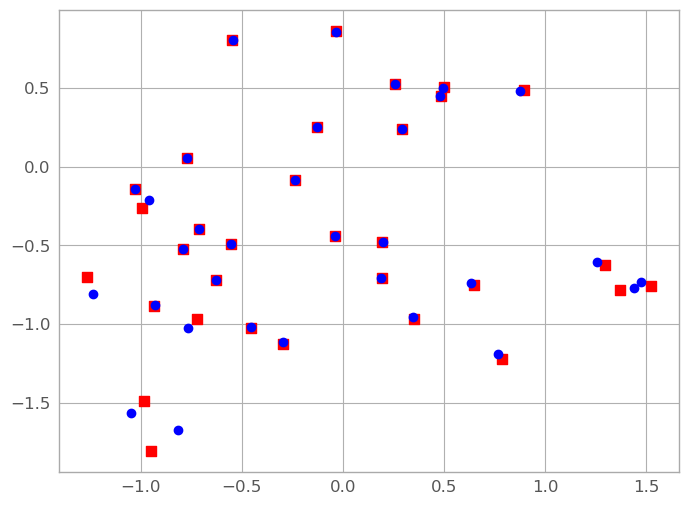

In [33]:
x_coords_a = []
y_coords_a = []
with open('/home/alam/task/task-inspecity/notebooks/matched.mtA', 'r') as file:
        for line in file:
            # Split the line into x and y coordinates
            _,x, y,_ = map(float, line.split())
            x_coords_a.append(x)
            y_coords_a.append(y)

x_coords_b = []
y_coords_b = []
with open('/home/alam/task/task-inspecity/notebooks/matched.mtB', 'r') as file:
        for line in file:
            # Split the line into x and y coordinates
            _,x, y,_ = map(float, line.split())
            x_coords_b.append(x)
            y_coords_b.append(y)


plt.scatter(x_coords_a,y_coords_a,color = 'r',marker = 's',s=50,label='from image')
plt.scatter(x_coords_b,y_coords_b,color = 'b',label='from catalog/')